In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from numpy.random import normal, uniform
from scipy.optimize import curve_fit

aspect_ratio = 16./9
BoiseState_blue = '#0033A0'
BoiseState_orange = '#D64309'

seconds_per_sol = 88775.

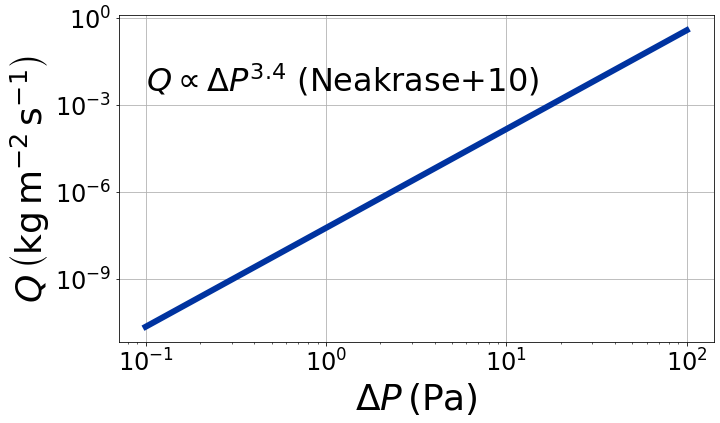

In [17]:
fig = plt.figure(figsize=(6*aspect_ratio, 6))
ax = fig.add_subplot(111)

Neakrase_exponent = 3.4
Neakrase_coefficient = 5.79e-8
Delta_Ps = 10.**(np.linspace(-1, 2))
Qs = Neakrase_coefficient*Delta_Ps**Neakrase_exponent

ax.loglog(Delta_Ps, Qs, lw=6, color=BoiseState_blue)
ax.text(0.1, 0.003, "$Q \\propto \\Delta P^{3.4}$ (Neakrase+10)", fontsize=32)

ax.grid(True)
ax.tick_params(labelsize=24)
ax.set_xlabel("$\\Delta P\, \\left({\\rm Pa}\\right)$", fontsize=36)
ax.set_ylabel("$Q\, \\left({\\rm kg\, m^{-2}\, s^{-1}}\\right)$", fontsize=36)

fig.savefig("Q_vs_Delta-P.png", dpi=500, bbox_inches="tight")

/Users/brian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/Users/brian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log10


-2.1027890098110125 0.37896747625991956
[0.06193933 0.0242388 ]


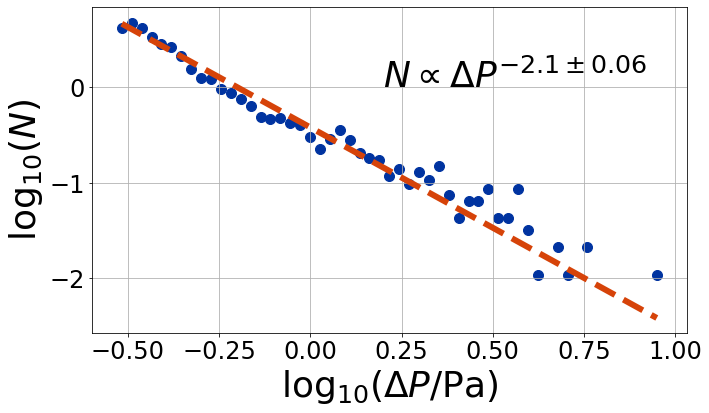

In [4]:
# 2020 Apr 23 - Analyzing population of dust devil pressure drops reported by Spiga
#   From github.com/aymeric-spiga/insight-atmosphere-nature-geoscience/blob/master/figure_vortices/alldrop_ordered.txt
filename = "alldrop_ordered.txt"

data = np.genfromtxt(filename, delimiter=" ; ", comments="#", usecols=[0], names=["DeltaP"])
hst, bin_edges = np.histogram(np.log10(-data["DeltaP"]), bins='auto', density=True)
bin_centers = 0.5*(bin_edges[1:] + bin_edges[0:-1])
ind = (bin_centers < 0.6) & (hst > 0.)

log10_hst_err = np.sqrt(hst)/(hst*np.log(10.))
res = np.polyfit(bin_centers[ind], np.log10(hst[ind]), 1, w=1./log10_hst_err[ind], cov=True)

gamma = res[0][0]
coefficient = 10**res[0][1]
print(gamma, coefficient)
print(np.sqrt(np.diag(res[1])))

fig = plt.figure(figsize=(6*aspect_ratio, 6))
ax = fig.add_subplot(111)

# ax.errorbar(bin_centers, np.log10(hst), yerr=log10_hst_err, marker='o', markersize=10, ls='', color=BoiseState_blue)
ax.scatter(bin_centers, np.log10(hst), marker='o', s=100, color=BoiseState_blue)
ax.plot(bin_centers, np.polyval(res[0], bin_centers), lw=6, color=BoiseState_orange, ls='--')

ax.grid(True)
ax.tick_params(labelsize=24)
ax.set_xlabel("$\\log_{10} \\left( \\Delta P/{\\rm Pa} \\right)$", fontsize=36)
ax.set_ylabel("$\\log_{10} \\left( N \\right)$", fontsize=36)

ax.text(0.2, 0, "$N \\propto \\Delta P^{%4.3g\\pm%.0g}$" % (res[0][0], np.sqrt(np.diag(res[1]))[0]), fontsize=36)

fig.savefig("Banfield_all-ordered_pop.png", dpi=500, bbox_inches="tight")

In [3]:
# 2020 Apr 23 - Analyzing population of dust devil pressure drops reported by Spiga
#   From github.com/aymeric-spiga/insight-atmosphere-nature-geoscience/blob/master/figure_vortices/alldrop_ordered.txt
filename = "alldrop_ordered.txt"

Insight_filename = "41561_2020_534_Fig5_HTML_b_Insight.txt"
Insight_data = np.genfromtxt(Insight_filename, delimiter=", ", comments="#", names=["logP", "logN"])
Insight_err = np.sqrt(10.**Insight_data["logN"])/(10.**Insight_data["logN"]*np.log(10.))
Insight_fit, Insight_cov = np.polyfit(Insight_data["logP"], Insight_data["logN"], 1, w=1./Insight_err, cov=True)
print("Insight_fit: ", Insight_fit)
print("Insight_fit_err: ", np.diag(np.sqrt(Insight_cov)))

# Binning using the plot in Banfield's paper
data = np.genfromtxt(filename, delimiter=" ; ", comments="#", usecols=[0], names=["DeltaP"])
# hst, bin_edges = np.histogram(np.log10(-data["DeltaP"]), bins='auto', density=True)
# bin_centers = 0.5*(bin_edges[1:] + bin_edges[0:-1])
# ind = (bin_centers < 0.6) & (hst > 0.)

bin_width = np.median(Insight_data["logP"][1:]-Insight_data["logP"][0:-1])
# bin_edges = np.array([np.min(Insight_data["logP"]) - 0.5*bin_width, 
#                      *(0.5*(Insight_data["logP"][1:] + Insight_data["logP"][0:-1])), 
#                      np.max(Insight_data["logP"]) + 0.5*bin_width])
hst, bin_edges = np.histogram(np.log10(-data["DeltaP"]), bins=bin_width)
print(hst)
log10_hst_err = np.sqrt(hst)/(hst*np.log(10.))
ind = (hst > 0.)
res = np.polyfit(Insight_data["logP"][ind], np.log10(hst[ind]), 1, w=1./log10_hst_err[ind], cov=True)

gamma = res[0][0]
coefficient = 10**res[0][1]
print(gamma, coefficient)
print(np.sqrt(np.diag(res[1])))

fig = plt.figure(figsize=(6*aspect_ratio, 6))
ax = fig.add_subplot(111)

# ax.errorbar(bin_centers, np.log10(hst), yerr=log10_hst_err, marker='o', markersize=10, ls='', color=BoiseState_blue)
# ax.scatter(bin_centers, np.log10(hst), marker='o', s=100, color=BoiseState_blue)
# ax.plot(bin_centers, np.polyval(res[0], bin_centers), lw=6, color=BoiseState_orange, ls='--')

# ax.errorbar(Insight_data["logP"], np.log10(hst), 
#             yerr=log10_hst_err, marker='o', markersize=10, ls='', color=BoiseState_blue)
ax.scatter(Insight_data["logP"], np.log10(hst), 
           marker='o', s=100, color=BoiseState_blue)
ax.plot(Insight_data["logP"], np.polyval(res[0], Insight_data["logP"]), 
        lw=6, color=BoiseState_orange, ls='--')

ax.grid(True)
ax.tick_params(labelsize=24)
ax.set_xlabel("$\\log_{10} \\left( \\Delta P/{\\rm Pa} \\right)$", fontsize=36)
ax.set_ylabel("$\\log_{10} \\left( N \\right)$", fontsize=36)

# ax.text(0.2, 2.25, "$N \\propto \\Delta P^{%4.3g\\pm%.0g}$" % (res[0][0], np.sqrt(np.diag(res[1]))[0]), fontsize=36)

Insight_fit:  [-1.82907246  0.19320096]
Insight_fit_err:  [0.002915   0.00057885]


TypeError: `bins` must be an integer, a string, or an array

Curiosity_fit:  [-3.11305144 -0.76242801]
Curiosity_fit_err:  [0.00681618 0.00122993]
Insight_fit:  [-1.82907246  0.19320096]
Insight_fit_err:  [0.002915   0.00057885]
Phoenix_fit:  [-2.32385837 -0.52560113]
Insight_fit_err:  [0.00971403 0.00171427]
Pathfinder_fit:  [-1.67161525 -0.12520046]
Pathfinder_fit_err:  [0.00416241 0.00081115]


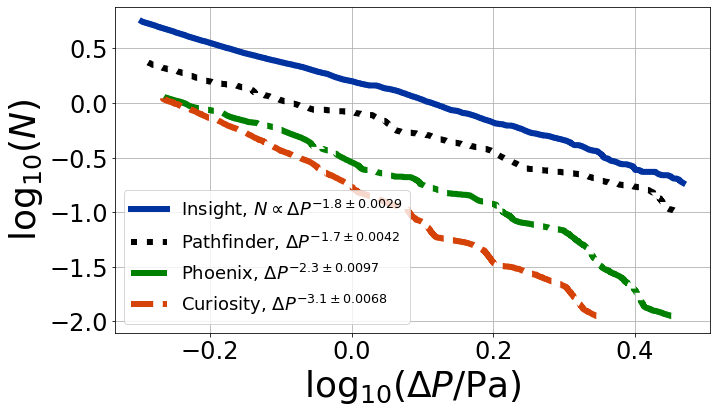

In [2]:
# 2020 Apr 25 - Analyzing population of dust devil pressure drops reported in Banfield, Spiga, et al. (2020)
#   after grabbing data from figure
Curiosity_filename = "41561_2020_534_Fig5_HTML_b_Curiosity.txt"
Insight_filename = "41561_2020_534_Fig5_HTML_b_Insight.txt"
Phoenix_filename = "41561_2020_534_Fig5_HTML_b_Phoenix.txt"
Pathfinder_filename = "41561_2020_534_Fig5_HTML_b_Pathfinder.txt"

Curiosity_data = np.genfromtxt(Curiosity_filename, delimiter=", ", comments="#", names=["logP", "logN"])
Curiosity_err = np.sqrt(10.**Curiosity_data["logN"])/(10.**Curiosity_data["logN"]*np.log(10.))

Insight_data = np.genfromtxt(Insight_filename, delimiter=", ", comments="#", names=["logP", "logN"])
Insight_err = np.sqrt(10.**Insight_data["logN"])/(10.**Insight_data["logN"]*np.log(10.))

Phoenix_data = np.genfromtxt(Phoenix_filename, delimiter=", ", comments="#", names=["logP", "logN"])
Phoenix_err = np.sqrt(10.**Phoenix_data["logN"])/(10.**Phoenix_data["logN"]*np.log(10.))

Pathfinder_data = np.genfromtxt(Pathfinder_filename, delimiter=", ", comments="#", names=["logP", "logN"])
Pathfinder_err = np.sqrt(10.**Pathfinder_data["logN"])/(10.**Pathfinder_data["logN"]*np.log(10.))

Curiosity_fit, Curiosity_cov = np.polyfit(Curiosity_data["logP"], Curiosity_data["logN"], 1, 
                                          w=1./Curiosity_err, cov=True)
print("Curiosity_fit: ", Curiosity_fit)
print("Curiosity_fit_err: ", np.diag(np.sqrt(Curiosity_cov)))

Insight_fit, Insight_cov = np.polyfit(Insight_data["logP"], Insight_data["logN"], 1, w=1./Insight_err, cov=True)
print("Insight_fit: ", Insight_fit)
print("Insight_fit_err: ", np.diag(np.sqrt(Insight_cov)))

Phoenix_fit, Phoenix_cov = np.polyfit(Phoenix_data["logP"], Phoenix_data["logN"], 1, w=1./Phoenix_err, cov=True)
print("Phoenix_fit: ", Phoenix_fit)
print("Insight_fit_err: ", np.diag(np.sqrt(Phoenix_cov)))

Pathfinder_fit, Pathfinder_cov = np.polyfit(Pathfinder_data["logP"], Pathfinder_data["logN"], 1, 
                                            w=1./Pathfinder_err, cov=True)
print("Pathfinder_fit: ", Pathfinder_fit)
print("Pathfinder_fit_err: ", np.diag(np.sqrt(Pathfinder_cov)))

fig = plt.figure(figsize=(6*aspect_ratio, 6))
ax = fig.add_subplot(111)

ax.plot(Insight_data["logP"], Insight_data["logN"], lw=6, color=BoiseState_blue, 
        label=("Insight, $N \\propto \\Delta P^{%.2g \\pm %.2g}$" % (Insight_fit[0], 
                                                                     np.diag(np.sqrt(Insight_cov))[0])))
ax.plot(Pathfinder_data["logP"], Pathfinder_data["logN"], lw=6, color="black", ls=':', 
        label=("Pathfinder, $\\Delta P^{%.2g \\pm %.2g}$" % (Pathfinder_fit[0], 
                                                             np.diag(np.sqrt(Pathfinder_cov))[0])))
ax.plot(Phoenix_data["logP"], Phoenix_data["logN"], lw=6, color="green", ls='-.', 
        label=("Phoenix, $\\Delta P^{%.2g \\pm %.2g}$" % (Phoenix_fit[0], 
                                                np.diag(np.sqrt(Phoenix_cov))[0])))
ax.plot(Curiosity_data["logP"], Curiosity_data["logN"], lw=6, color=BoiseState_orange, ls='--', 
        label=("Curiosity, $\\Delta P^{%.2g \\pm %.2g}$" % (Curiosity_fit[0], 
                                                  np.diag(np.sqrt(Curiosity_cov))[0])))
ax.grid(True)
ax.legend(loc='best', fontsize=18)
ax.tick_params(labelsize=24)
ax.set_xlabel("$\\log_{10} \\left( \\Delta P/{\\rm Pa} \\right)$", fontsize=36)
ax.set_ylabel("$\\log_{10} \\left( N \\right)$", fontsize=36)

# fig.savefig("Pressure_Dip_Histograms.png", dpi=500, bbox_inches="tight")

Text(0, 0.5, '# of Sols')

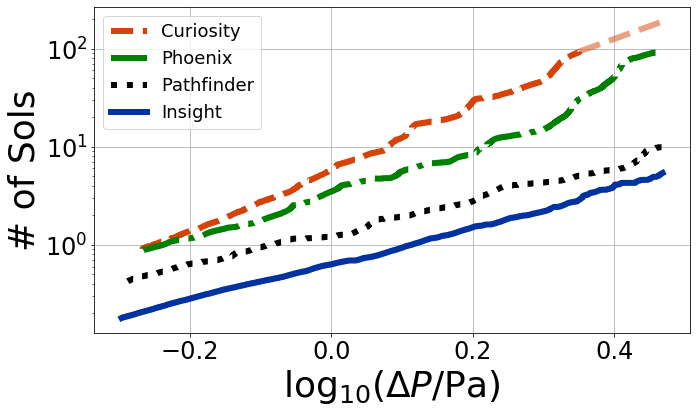

In [41]:
# 2020 Apr 25 - Analyzing population of dust devil pressure drops reported in Banfield, Spiga, et al. (2020)
#   after grabbing data from figure
Curiosity_filename = "41561_2020_534_Fig5_HTML_b_Curiosity.txt"
Insight_filename = "41561_2020_534_Fig5_HTML_b_Insight.txt"
Phoenix_filename = "41561_2020_534_Fig5_HTML_b_Phoenix.txt"
Pathfinder_filename = "41561_2020_534_Fig5_HTML_b_Pathfinder.txt"

Curiosity_data = np.genfromtxt(Curiosity_filename, delimiter=", ", comments="#", names=["logP", "logN"])
Insight_data = np.genfromtxt(Insight_filename, delimiter=", ", comments="#", names=["logP", "logN"])
Phoenix_data = np.genfromtxt(Phoenix_filename, delimiter=", ", comments="#", names=["logP", "logN"])
Pathfinder_data = np.genfromtxt(Pathfinder_filename, delimiter=", ", comments="#", names=["logP", "logN"])

fig = plt.figure(figsize=(6*aspect_ratio, 6))
ax = fig.add_subplot(111)

ax.semilogy(Curiosity_data["logP"], 1./10**Curiosity_data["logN"], lw=6, color=BoiseState_orange, ls='--', 
        label="Curiosity")
ax.semilogy([Curiosity_data["logP"][-1], Insight_data["logP"][-1]], 
            [1./10**Curiosity_data["logN"][-1], 1./10**(np.polyval(Curiosity_fit, Insight_data["logP"][-1]))], 
           lw=6, color=BoiseState_orange, ls='--', alpha=0.5)

ax.semilogy(Phoenix_data["logP"], 1./10**Phoenix_data["logN"], lw=6, color="green", ls='-.', 
        label="Phoenix")

ax.semilogy(Pathfinder_data["logP"], 1./10**Pathfinder_data["logN"], lw=6, color="black", ls=':', 
        label="Pathfinder")

ax.semilogy(Insight_data["logP"], 1./10**Insight_data["logN"], lw=6, color=BoiseState_blue, label="Insight")

ax.grid(True)
ax.legend(loc='best', fontsize=18)
ax.tick_params(labelsize=24)
ax.set_xlabel("$\\log_{10} \\left( \\Delta P/{\\rm Pa} \\right)$", fontsize=36)
ax.set_ylabel("# of Sols", fontsize=36)

#### The population-weighted dust flux

The histogram as a function of vortex $\Delta P$ is given by $N(\Delta P) = k \Delta P^{-\gamma}$.

If the dust flux from a single dust devil with a given $\Delta P$-value is given by $Q(\Delta P) = h \Delta P^{\delta}$ with $h = 5.79\times10^{-8}\, {\rm kg/m^2/s}$, then the population-weighted average flux is 
$$
\langle Q \rangle = \int_{\Delta P_{\rm min}}^{\Delta P_{\rm max}} Q(\Delta P)\ N(\Delta P)\ d\Delta P \\
= h\ k \int_{\Delta P_{\rm min}}^{\Delta P_{\rm max}} \Delta P^{\delta -\gamma}\ d\Delta P\\
= \dfrac{h\ k}{1 + \delta - \gamma} \left( \Delta P_{\rm max}^{1 + \delta - \gamma} - \Delta P_{\rm min}^{1 + \delta - \gamma} \right).
$$

In [20]:
def flux(Delta_P, h=5.79e-8, delta=3.4):
    return h*Delta_P**delta

def integrated_flux(gamma, delta, mx, mn, k=Insight_fit[1], h=5.79e-8):
    return h*k/(1. + delta - gamma)*(mx**(1. + delta - gamma) - mn**(1. + delta - gamma))

In [8]:
print(integrated_flux(2., 3.4, 10., 9.))
print(integrated_flux(2., 3.4, 10., 1.))

2.615851977121267e-07
1.1661225248853907e-06


Text(0, 0.5, '$\\langle Q \\rangle\\, \\left( {\\rm g/m^2/sol} \\right)$')

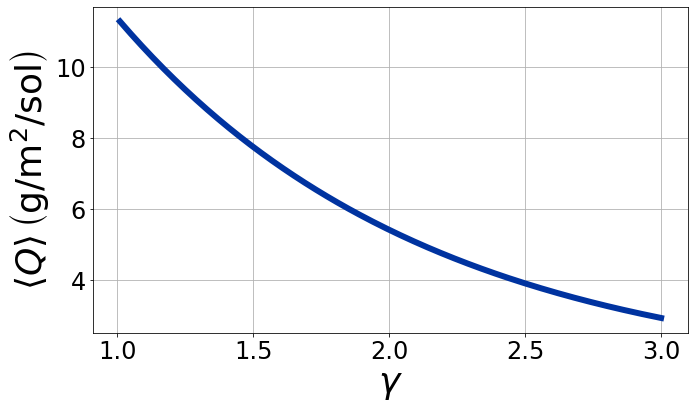

In [9]:
# 2020 Apr 24 - Calculate population-weighted dust flux
min_DeltaP = np.min(10**Insight_data["logP"])
max_DeltaP = np.max(10**Insight_data["logP"])

# gamma = res[0][0]
gammas = np.arange(1.01, 3.01, 0.01)
delta = 3.4

Qs = integrated_flux(gammas, delta, max_DeltaP, min_DeltaP)

fig = plt.figure(figsize=(6*aspect_ratio, 6))
ax = fig.add_subplot(111)

ax.plot(gammas, Qs*seconds_per_sol*1000., lw=6, color=BoiseState_blue)

ax.grid(True)
ax.tick_params(labelsize=24)
ax.set_xlabel("$\\gamma$", fontsize=36)
ax.set_ylabel("$\\langle Q \\rangle\, \\left( {\\rm g/m^2/sol} \\right)$", fontsize=36)

1.8560532676535003e-07 1.4815240289097096e-06


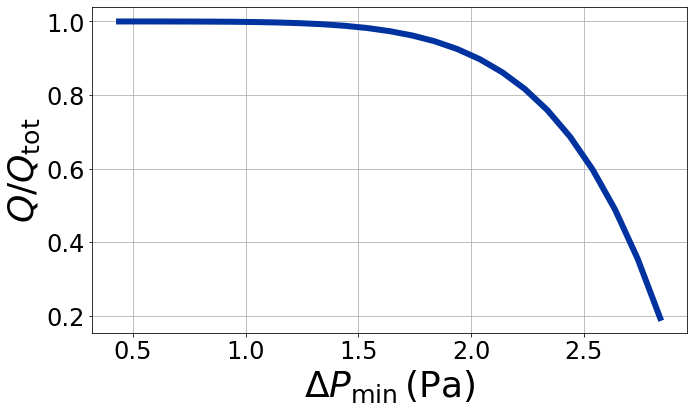

In [21]:
# 2020 Apr 24 - Calculate population-weighted dust flux
min_DeltaP = np.min(10**Insight_data["logP"])
max_DeltaP = np.max(10**Insight_data["logP"])
delta = 3.4

# Calculate the actual best-estimate average dust flux
best_est_Q = integrated_flux(Insight_fit[0], delta, max_DeltaP, min_DeltaP)
avg_DD_Q = flux(np.mean(10**Insight_data["logP"]))
print(avg_DD_Q, best_est_Q)

# Now calculate how the dust flux estimate depends on the max Delta P
min_DeltaPs = max_DeltaP - np.arange(0.1, (max_DeltaP - min_DeltaP) + 0.1, 0.1)
Qs = integrated_flux(Insight_fit[0], delta, max_DeltaP, min_DeltaPs)

fig = plt.figure(figsize=(6*aspect_ratio, 6))
ax = fig.add_subplot(111)

ax.plot(min_DeltaPs, Qs/best_est_Q, lw=6, color=BoiseState_blue)

ax.grid(True)
ax.tick_params(labelsize=24)
ax.set_xlabel("$\\Delta P_{\\rm min}\, \\left( {\\rm Pa} \\right)$", fontsize=36)
ax.set_ylabel("$Q/Q_{\\rm tot}$", fontsize=36)

fig.savefig("smallest_DeltaP_to_measure.png", dpi=500, bbox_inches="tight")

0.95 0.65


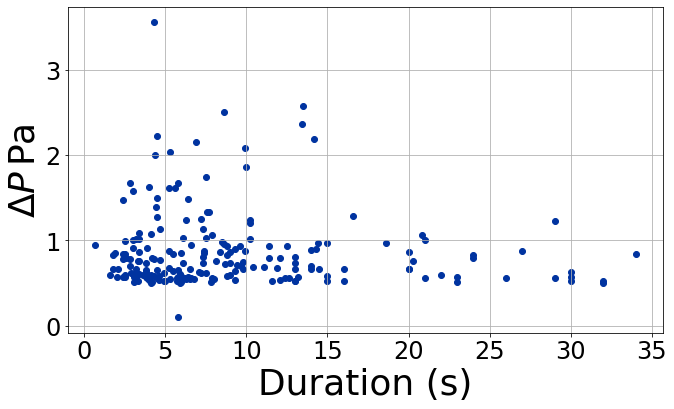

In [3]:
# 2020 May 5 - Reading Ellehoj's detections - https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2009JE003413
filename = "Ellehoj2010_detections.txt"
Ellehoj_data = np.genfromtxt(filename, delimiter="\t", usecols=(3, 4), names=["DeltaP", "Duration"])

fig = plt.figure(figsize=(6*aspect_ratio, 6))
ax = fig.add_subplot(111)

ax.scatter(Ellehoj_data["Duration"], Ellehoj_data["DeltaP"], marker='o', color=BoiseState_blue)

ax.set_xlabel("Duration (s)", fontsize=36)
ax.set_ylabel("$\\Delta P\,{\\rm Pa}$", fontsize=36)
ax.tick_params(labelsize=24)
ax.grid(True)

# Highest Delta-P also has one of the smallest durations
ind = np.argmin(Ellehoj_data["Duration"])
print(Ellehoj_data["DeltaP"][ind], Ellehoj_data["Duration"][ind])

# fig.savefig("Ellehoj2010_detections.png", dpi=500, bbox_inches="tight")

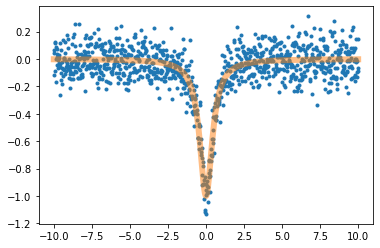

In [2]:
# Generate grid of synthetic profiles and fit
def Lorentz_profile(time, DeltaP, duration, t0):
    return -DeltaP/(1. + (2.*(time - t0)/duration)**2)

def make_noisy(signal, noise):
    return signal + normal(scale=noise, size=len(signal))

DeltaP = 1.
noise = DeltaP/10.
duration = 1.

time = np.linspace(-10, 10, 1000)

profile = Lorentz_profile(time, DeltaP, duration, 0.)
noisy_profile = make_noisy(profile, noise)

plt.plot(time, noisy_profile, marker='.', ls='')
plt.plot(time, profile, lw=6, alpha=0.5)

In [ ]:
delta = 3.4
Q_flux_errs = DeltaP**delta*delta/DeltaP*fit_DeltaPs_errs

fig = plt.figure(figsize=(6*aspect_ratio, 6))

ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

# ax1.loglog(grid_of_noises, grid_of_noises, lw=10, ls='--', color=BoiseState_orange)
ax1.loglog(grid_of_noises, fit_DeltaPs_errs, lw=6, color=BoiseState_blue)
ax1.axhline(1., color=BoiseState_blue, zorder=-1, lw=6, ls=':', alpha=0.5)

ax1.set_xlabel("$\\sigma\,\\left({\\rm Pa}\\right)$", fontsize=36)
ax1.set_ylabel("$\\sigma \\left( \\Delta P \\right)\,\\left({\\rm Pa}\\right)$", fontsize=36, color=BoiseState_blue)
ax1.tick_params(labelsize=24)
ax1.tick_params(axis='y', labelcolor=BoiseState_blue)
ax1.set_ylim([1e-2, 1e1])

ax2.loglog(grid_of_noises, Q_flux_errs, lw=6, ls='--', color=BoiseState_orange)
ax2.axhline(delta*DeltaP**delta, color=BoiseState_orange, zorder=-1, lw=6, ls=':', alpha=0.5)

ax2.set_ylabel("$\\sigma \\left( \\Delta Q \\right)\,\\left({\\rm kg\ m^{-2}\ s^{-1}}\\right)$", 
               fontsize=28, color=BoiseState_orange)
ax2.tick_params(labelsize=24)
ax2.tick_params(axis='y', labelcolor=BoiseState_orange)
ax2.set_ylim([1e-2, 1e2])

0.1
1.0 0.5 0.0
[1.03651554e+00 5.79414680e-03 5.86117430e-04]
----
0.3111111111111111
1.0 0.5 0.0
[0.03897994 5.29067537 0.5145728 ]
----
0.5222222222222223
1.0 0.5 0.0
----
0.7333333333333333
1.0 0.5 0.0
[0.63421383 0.62853157 0.01767417]
----
0.9444444444444444
1.0 0.5 0.0
[ 0.86812115  0.54272694 -0.02117866]
----
1.1555555555555557
1.0 0.5 0.0
[0.86563802 0.55125338 0.02554312]
----
1.3666666666666667
1.0 0.5 0.0
[ 0.8166551   0.59436449 -0.01357561]
----
1.577777777777778
1.0 0.5 0.0
[0.96814935 0.53569318 0.01880116]
----
1.788888888888889
1.0 0.5 0.0
[ 0.99432142  0.50496139 -0.00222059]
----
2.0
1.0 0.5 0.0
[ 0.99589248  0.48973278 -0.00626434]
----


/Users/brian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in double_scalars
/Users/brian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in double_scalars


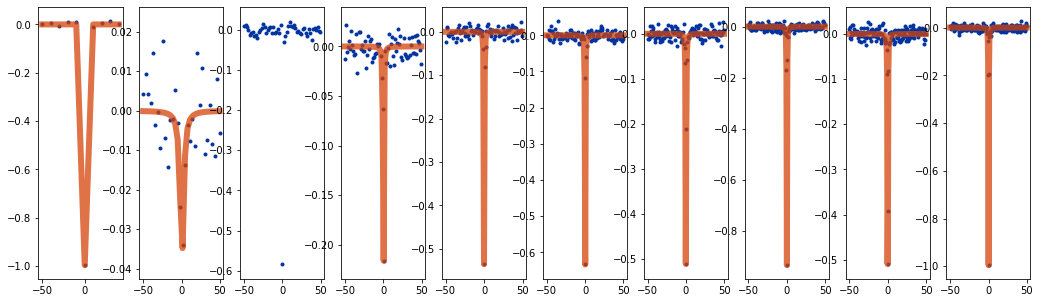

In [62]:
# 2020 May 8 - Experimenting with sampling
num_grid = 10

DeltaP = 1.
duration = 0.5
num_durations = 100
noise = DeltaP/100.
t0 = 0.

grid_of_samplings = np.linspace(0.1, 2., num_grid)

fig = plt.figure(figsize=(10*aspect_ratio, 5))

fit_DeltaPs = np.zeros(len(grid_of_samplings))
fit_durations = np.zeros((len(grid_of_samplings)))

plot_num = 1
for i in range(len(grid_of_samplings)): 
        
    time_sampling = 1./grid_of_samplings[i]
    time = np.arange(-num_durations*duration, num_durations*duration, time_sampling)
    
    ax = fig.add_subplot(1, len(grid_of_samplings), plot_num)

    profile = make_noisy(Lorentz_profile(time, DeltaP, duration, t0), noise)
    ax.scatter(time, profile, marker='.', color=BoiseState_blue)

    # Fit to the data
    print(grid_of_samplings[i])
    print(DeltaP, duration, t0)
    try:
        popt, pcov = curve_fit(Lorentz_profile, time, profile, sigma=noise*np.ones_like(time),
                               p0=[1., 0.1, 0.])

        print(popt)
        fit_DeltaPs[i] = np.abs(popt[0] - DeltaP)/errs[0]
        fit_durations[i] = np.abs(popt[1] - duration)/errs[1]

        ax.plot(time, Lorentz_profile(time, *popt), color=BoiseState_orange, alpha=0.75, lw=6)
    except:
        pass

    print("----")
    plot_num += 1

In [3]:
plot = True

# 2020 May 8 - Experimenting with sampling
num_grid = 10
num_trials = 1

DeltaP = 1.
duration = 0.5
t0 = 0.
sampling = 2.

time_sampling = 1./sampling
time = np.arange(-num_durations*duration, num_durations*duration, time_sampling)

grid_of_noises = 10.**np.linspace(-2., 0., num_grid)

fit_DeltaPs = np.zeros(len(grid_of_noises))
fit_DeltaPs_errs = np.zeros(len(grid_of_noises))
fit_durations = np.zeros((len(grid_of_noises)))
fit_durations_errs = np.zeros((len(grid_of_noises)))

if(plot):
    fig = plt.figure(figsize=(12, 4))
    
plot_num = 1
for i in range(len(grid_of_noises)): 

    profile = make_noisy(Lorentz_profile(time, DeltaP, duration, t0), grid_of_noises[i])

    num_fit = 0.
    
    for j in range(num_trials):
        try:
            popt, pcov = curve_fit(Lorentz_profile, time, profile, sigma=grid_of_noises[i]*np.ones_like(time),
                                   p0=[1., 0.1, 0.])

            if(plot):
                ax = fig.add_subplot(1, num_grid, plot_num)
                ax.scatter(time, profile)
                ax.plot(time, Lorentz_profile(time, *popt))
            
            errs = np.sqrt(np.diag(pcov))
            fit_DeltaPs[i] += popt[0]
            fit_DeltaPs_errs[i] += errs[0]
            fit_durations[i] += popt[1]
            fit_durations_errs[i] += errs[1]
            
            num_fit += 1

        except:
            pass

#     print("----")
    plot_num += 1
    
    fit_DeltaPs[i] /= num_fit
    fit_DeltaPs_errs[i] /= num_fit
    fit_durations[i] /= num_fit
    fit_durations_errs[i] /= num_fit

NameError: name 'num_durations' is not defined

In [12]:
plot = False
# 2 Hz sampling!!

# 2020 May 8 - Experimenting with sampling
num_grid = 20
num_trials = 1000

DeltaP = 1.
duration = 0.5
t0 = 0.
sampling = 2.
num_durations = 10.

time_sampling = 1./sampling
time = np.arange(-num_durations*duration, num_durations*duration, time_sampling)

grid_of_noises = 10.**np.linspace(-2., 0., num_grid)

fit_DeltaPs = np.zeros(len(grid_of_noises))
fit_DeltaPs_errs = np.zeros(len(grid_of_noises))
fit_durations = np.zeros((len(grid_of_noises)))
fit_durations_errs = np.zeros((len(grid_of_noises)))

if(plot):
    fig = plt.figure(figsize=(12, 4))
plot_num = 1
for i in range(len(grid_of_noises)): 

    num_fit = 0.
    
    for j in range(num_trials):
        try:
            profile = make_noisy(Lorentz_profile(time, DeltaP, duration, t0), grid_of_noises[i])
            popt, pcov = curve_fit(Lorentz_profile, time, profile, sigma=grid_of_noises[i]*np.ones_like(time),
                                   p0=[1., 0.1, 0.])
            
#             print("DID work: ", 
#                   i, grid_of_noises[i], j, np.sum(profile))

            errs = np.sqrt(np.diag(pcov))
            if(~np.isnan(errs[0]) and ~np.isnan(errs[1])):
                fit_DeltaPs[i] += popt[0]
                fit_DeltaPs_errs[i] += errs[0]
                fit_durations[i] += popt[1]
                fit_durations_errs[i] += errs[1]
            
                num_fit += 1
                
                if(plot):
                    ax = fig.add_subplot(1, num_grid, plot_num)
                    ax.scatter(time, profile, color=BoiseState_blue)
                    ax.plot(time, Lorentz_profile(time, *popt), color=BoiseState_orange)

        except:
#             print("didn't work: ", 
#                   i, grid_of_noises[i], j, np.sum(profile))
            pass

#     print("----")
    plot_num += 1
    
    fit_DeltaPs[i] /= num_fit
    fit_DeltaPs_errs[i] /= num_fit
    fit_durations[i] /= num_fit
    fit_durations_errs[i] /= num_fit

/Users/brian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: invalid value encountered in sqrt
/Users/brian/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


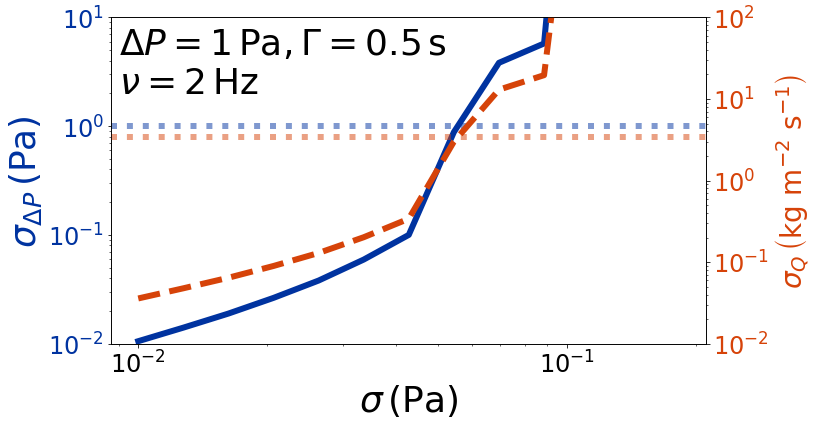

In [13]:
delta = 3.4
Q_flux_errs = DeltaP**delta*delta/DeltaP*fit_DeltaPs_errs

fig = plt.figure(figsize=(6*aspect_ratio, 6))

ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

# ax1.loglog(grid_of_noises, grid_of_noises, lw=10, ls='--', color=BoiseState_orange)
ax1.loglog(grid_of_noises, fit_DeltaPs_errs, lw=6, color=BoiseState_blue)
ax1.axhline(1., color=BoiseState_blue, zorder=-1, lw=6, ls=':', alpha=0.5)

ax1.set_xlabel("$\\sigma\,\\left({\\rm Pa}\\right)$", fontsize=36)
ax1.set_ylabel("$\\sigma_{\\Delta P}\,\\left({\\rm Pa}\\right)$", fontsize=36, color=BoiseState_blue)
ax1.tick_params(labelsize=24)
ax1.tick_params(axis='y', labelcolor=BoiseState_blue)
ax1.set_ylim([1e-2, 1e1])

ax2.loglog(grid_of_noises, Q_flux_errs, lw=6, ls='--', color=BoiseState_orange)
ax2.axhline(delta*DeltaP**delta, color=BoiseState_orange, zorder=-1, lw=6, ls=':', alpha=0.5)

ax2.set_ylabel("$\\sigma_{Q}\,\\left({\\rm kg\ m^{-2}\ s^{-1}}\\right)$", 
               fontsize=28, color=BoiseState_orange)
ax2.tick_params(labelsize=24)
ax2.tick_params(axis='y', labelcolor=BoiseState_orange)
ax2.set_ylim([1e-2, 1e2])

ax1.text(0.009, 2, "$\\Delta P = 1\,{\\rm Pa}, \\Gamma = 0.5\,{\\rm s}$\n$\\nu = 2\,{\\rm Hz}$", fontsize=36)

fig.savefig("Pressure_Uncertainty_2-Hz.png", dpi=500, bbox_inches="tight")

In [14]:
plot = False
# 5 Hz sampling!!

# 2020 May 8 - Experimenting with sampling
num_grid = 20
num_trials = 1000

DeltaP = 1.
duration = 0.5
t0 = 0.
sampling = 20.
num_durations = 10.

time_sampling = 1./sampling
time = np.arange(-num_durations*duration, num_durations*duration, time_sampling)

grid_of_noises = 10.**np.linspace(-2., 0., num_grid)

fit_DeltaPs = np.zeros(len(grid_of_noises))
fit_DeltaPs_errs = np.zeros(len(grid_of_noises))
fit_durations = np.zeros((len(grid_of_noises)))
fit_durations_errs = np.zeros((len(grid_of_noises)))

if(plot):
    fig = plt.figure(figsize=(12, 4))
plot_num = 1
for i in range(len(grid_of_noises)): 

    num_fit = 0.
    
    for j in range(num_trials):
        try:
            profile = make_noisy(Lorentz_profile(time, DeltaP, duration, t0), grid_of_noises[i])
            popt, pcov = curve_fit(Lorentz_profile, time, profile, sigma=grid_of_noises[i]*np.ones_like(time),
                                   p0=[1., 0.1, 0.])
            
#             print("DID work: ", 
#                   i, grid_of_noises[i], j, np.sum(profile))

            errs = np.sqrt(np.diag(pcov))
            if(~np.isnan(errs[0]) and ~np.isnan(errs[1])):
                fit_DeltaPs[i] += popt[0]
                fit_DeltaPs_errs[i] += errs[0]
                fit_durations[i] += popt[1]
                fit_durations_errs[i] += errs[1]
            
                num_fit += 1
                
                if(plot):
                    ax = fig.add_subplot(1, num_grid, plot_num)
                    ax.scatter(time, profile, color=BoiseState_blue)
                    ax.plot(time, Lorentz_profile(time, *popt), color=BoiseState_orange)

        except:
#             print("didn't work: ", 
#                   i, grid_of_noises[i], j, np.sum(profile))
            pass

#     print("----")
    plot_num += 1
    
    fit_DeltaPs[i] /= num_fit
    fit_DeltaPs_errs[i] /= num_fit
    fit_durations[i] /= num_fit
    fit_durations_errs[i] /= num_fit

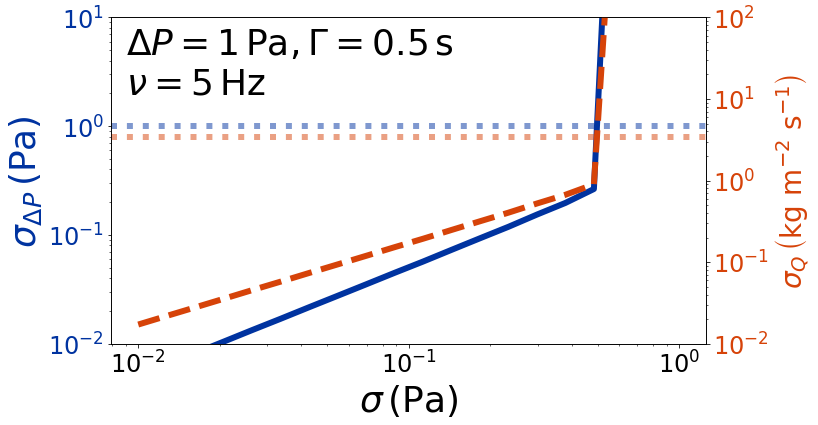

In [17]:
delta = 3.4
Q_flux_errs = DeltaP**delta*delta/DeltaP*fit_DeltaPs_errs

fig = plt.figure(figsize=(6*aspect_ratio, 6))

ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

# ax1.loglog(grid_of_noises, grid_of_noises, lw=10, ls='--', color=BoiseState_orange)
ax1.loglog(grid_of_noises, fit_DeltaPs_errs, lw=6, color=BoiseState_blue)
ax1.axhline(1., color=BoiseState_blue, zorder=-1, lw=6, ls=':', alpha=0.5)

ax1.set_xlabel("$\\sigma\,\\left({\\rm Pa}\\right)$", fontsize=36)
ax1.set_ylabel("$\\sigma_{\\Delta P}\,\\left({\\rm Pa}\\right)$", fontsize=36, color=BoiseState_blue)
ax1.tick_params(labelsize=24)
ax1.tick_params(axis='y', labelcolor=BoiseState_blue)
ax1.set_ylim([1e-2, 1e1])

ax2.loglog(grid_of_noises, Q_flux_errs, lw=6, ls='--', color=BoiseState_orange)
ax2.axhline(delta*DeltaP**delta, color=BoiseState_orange, zorder=-1, lw=6, ls=':', alpha=0.5)

ax2.set_ylabel("$\\sigma_{Q}\,\\left({\\rm kg\ m^{-2}\ s^{-1}}\\right)$", 
               fontsize=28, color=BoiseState_orange)
ax2.tick_params(labelsize=24)
ax2.tick_params(axis='y', labelcolor=BoiseState_orange)

ax1.text(0.009, 2, "$\\Delta P = 1\,{\\rm Pa}, \\Gamma = 0.5\,{\\rm s}$\n$\\nu = 5\,{\\rm Hz}$", fontsize=36)

ax2.set_ylim([1e-2, 1e2])

fig.savefig("Pressure_Uncertainty_5-Hz.png", dpi=500, bbox_inches="tight")

0.0
0.1
1.0 -1.0
----
1.4285714285714448
0.3111111111111111
1.0 -0.029714978775014507
----
0.21276595744677707
0.5222222222222223
1.0 -0.579942242058355
----
0.45454545454557405
0.7333333333333333
1.0 -0.232245681381864
----
0.23529411764690167
0.9444444444444444
1.0 -0.5302752293581309
----
0.1923076923075655
1.1555555555555557
1.0 -0.6282527881043972
----
0.24390243902422526
1.3666666666666667
1.0 -0.5123437976230141
----
0.07042253521123598
1.577777777777778
1.0 -0.9264841021871592
----
0.2484472049687909
1.788888888888889
1.0 -0.5031152345648547
----
0.0
2.0
1.0 -1.0
----


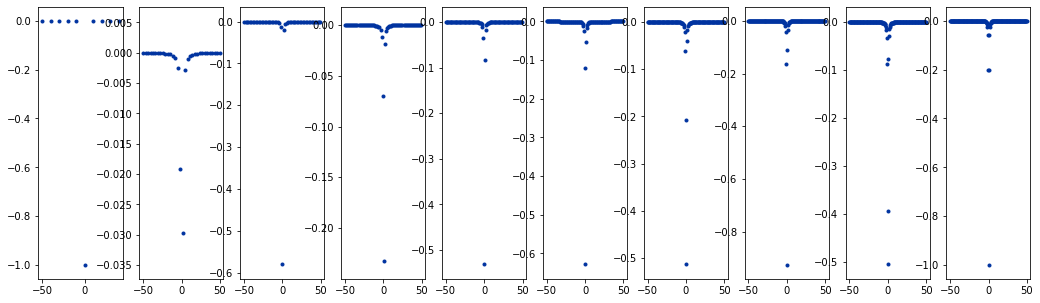

In [60]:
# 2020 May 8 - Experimenting with sampling
num_grid = 10

DeltaP = 1.
duration = 0.5
num_durations = 100
t0 = 0.

grid_of_samplings = np.linspace(0.1, 2., num_grid)

fig = plt.figure(figsize=(10*aspect_ratio, 5))

plot_num = 1
for i in range(len(grid_of_samplings)): 
        
    time_sampling = 1./grid_of_samplings[i]
    time = np.arange(-num_durations*duration, num_durations*duration, time_sampling)
    
    ax = fig.add_subplot(1, len(grid_of_samplings), plot_num)

    profile = Lorentz_profile(time, DeltaP, duration, t0)
    ax.scatter(time, profile, marker='.', color=BoiseState_blue)

    # Fit to the data
    print(grid_of_samplings[i])
    print(DeltaP, np.min(profile))
    print("----")
    plot_num += 1

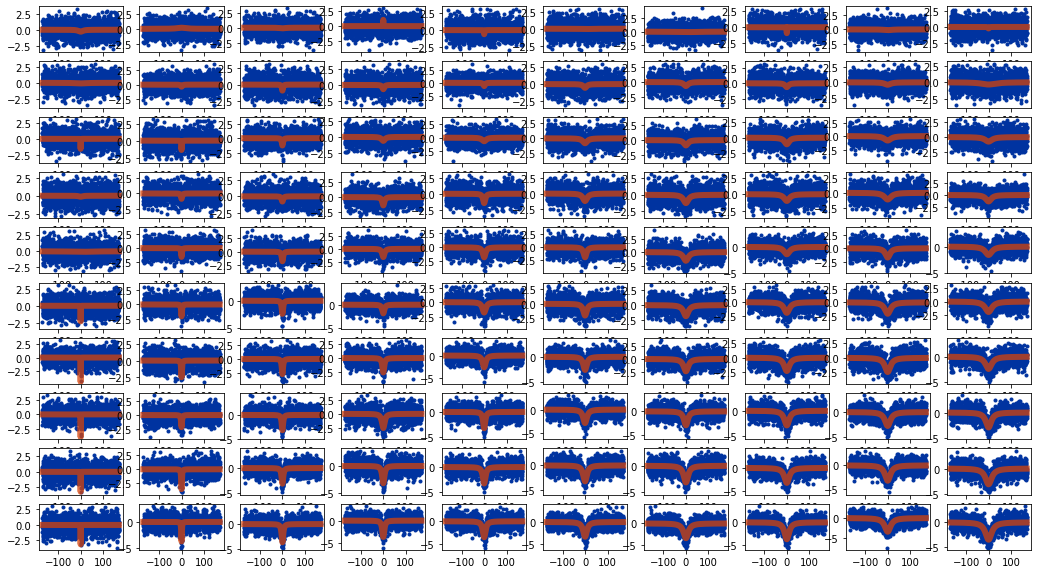

In [16]:
num_grid = 10
grid_of_durations = np.linspace(np.min(Ellehoj_data["Duration"]), np.max(Ellehoj_data["Duration"]), num_grid)
grid_of_DeltaPs = np.linspace(np.min(Ellehoj_data["DeltaP"]), np.max(Ellehoj_data["DeltaP"]), num_grid)

# From PAMI spreadsheet
noise = 1. # Pa
sampling_frequency = 5.
time_sampling = 1./sampling_frequency
time = np.arange(-5*np.max(grid_of_durations), 5*np.max(grid_of_durations), time_sampling)

fig = plt.figure(figsize=(10*aspect_ratio, 10))

fit_DeltaPs = np.zeros((len(grid_of_DeltaPs), len(grid_of_durations)))
fit_durations = np.zeros((len(grid_of_DeltaPs), len(grid_of_durations)))

plot_num = 1
for i in range(len(grid_of_DeltaPs)):
    for j in range(len(grid_of_durations)):   
        ax = fig.add_subplot(len(grid_of_DeltaPs), len(grid_of_durations), plot_num)
        
        profile = Lorentz_profile(time, grid_of_DeltaPs[i], grid_of_durations[j])
        noisy_profile = make_noisy(profile, noise)

        ax.scatter(time, noisy_profile, marker='.', color=BoiseState_blue)
        
        # Fit to the data
        popt, pcov = curve_fit(Lorentz_profile, time, noisy_profile, sigma=noise*np.ones_like(time),
                               p0=[np.mean(Ellehoj_data["DeltaP"]), np.mean(Ellehoj_data["Duration"])])
        errs = np.sqrt(np.diag(pcov))
        
        fit_DeltaPs[i,j] = np.abs(popt[0] - grid_of_DeltaPs[i])/errs[0]
        fit_durations[i,j] = np.abs(popt[1] - grid_of_durations[j])/errs[1]
        
#         print(np.abs(popt[0] - grid_of_DeltaPs[i])/errs[0], np.abs(popt[1] - grid_of_durations[j])/errs[1])

        ax.plot(time, Lorentz_profile(time, *popt), color=BoiseState_orange, alpha=0.75, lw=6)
        
        plot_num += 1

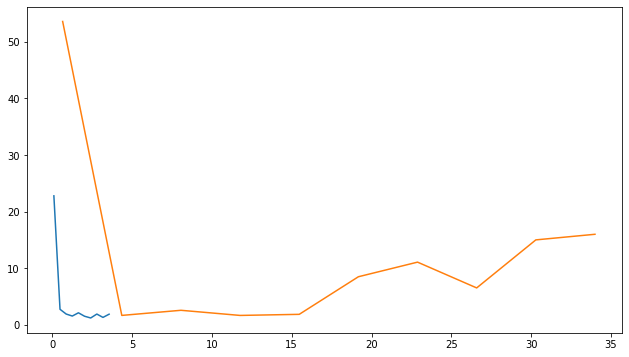

In [17]:
DeltaPs_grid, durations_grid = np.meshgrid(grid_of_DeltaPs, grid_of_durations)

fig = plt.figure(figsize=(6*aspect_ratio,6))
ax = fig.add_subplot(111)

ax.plot(grid_of_DeltaPs, np.max(fit_DeltaPs, axis=0))
ax.plot(grid_of_durations, np.max(fit_durations, axis=1))

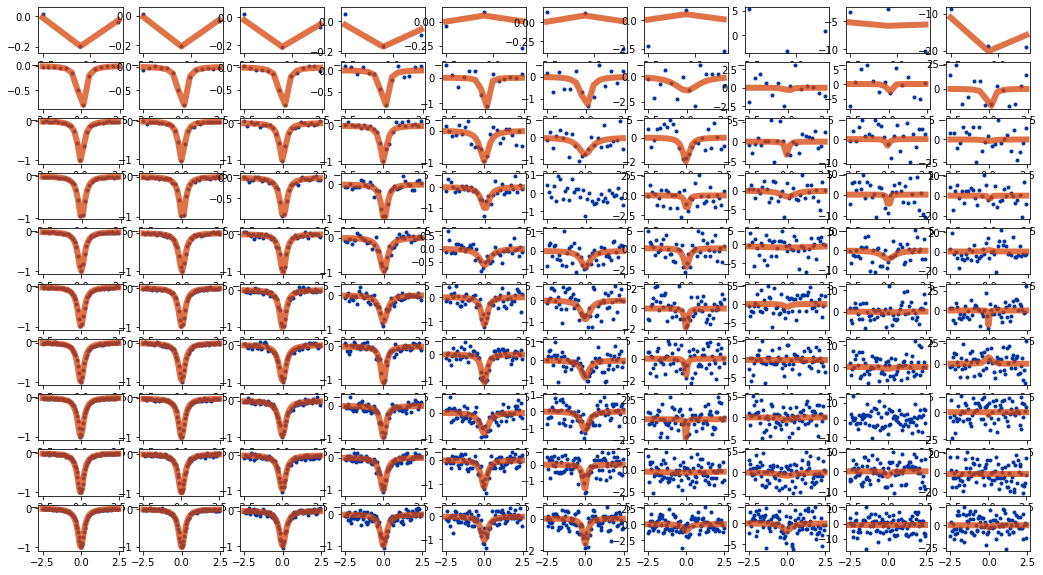

In [48]:
num_grid = 10

DeltaP = 1.
duration = 0.5

grid_of_samplings = np.linspace(0.5, 20, num_grid)
grid_of_noises = 10.**np.linspace(-2., 1., num_grid)

fig = plt.figure(figsize=(10*aspect_ratio, 10))

fit_DeltaPs = np.zeros((len(grid_of_samplings), len(grid_of_noises)))
fit_durations = np.zeros((len(grid_of_samplings), len(grid_of_noises)))

plot_num = 1
for i in range(len(grid_of_samplings)):
    for j in range(len(grid_of_noises)): 
        
        time_sampling = 1./grid_of_samplings[i]
        time = np.arange(-5*duration, 5*duration, time_sampling)

        ax = fig.add_subplot(len(grid_of_samplings), len(grid_of_noises), plot_num)
        
        profile = Lorentz_profile(time, DeltaP, duration)
        noisy_profile = make_noisy(profile, grid_of_noises[j])

        ax.scatter(time, noisy_profile, marker='.', color=BoiseState_blue)
        
        # Fit to the data
        try:
            popt, pcov = curve_fit(Lorentz_profile, time, noisy_profile, sigma=np.ones_like(time)*grid_of_noises[j],
                                   p0=[1., 0.5])
            errs = np.sqrt(np.diag(pcov))
        
            fit_DeltaPs[i,j] = np.abs(popt[0] - grid_of_DeltaPs[i])/errs[0]
            fit_durations[i,j] = np.abs(popt[1] - grid_of_durations[j])/errs[1]
        
#             fit_DeltaPs[i,j] = popt[0]
#             fit_durations[i,j] = popt[1]

#             print(np.abs(popt[0] - grid_of_DeltaPs[i])/errs[0], np.abs(popt[1] - grid_of_durations[j])/errs[1])

            ax.plot(time, Lorentz_profile(time, *popt), color=BoiseState_orange, alpha=0.75, lw=6)
        except:
            pass
        
        plot_num += 1

(0.1, 1000.0)

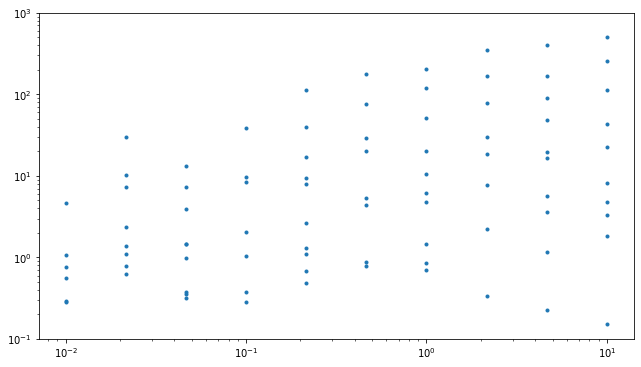

In [55]:
samplings_grid, noises_grid = np.meshgrid(grid_of_samplings, grid_of_noises)

fig = plt.figure(figsize=(6*aspect_ratio,6))
ax = fig.add_subplot(111)

# ax.contour(fit_DeltaPs, samplings_grid, np.log10(noises_grid))
# ax.plot(grid_of_samplings, np.max(fit_DeltaPs, axis=0), color=BoiseState_blue, lw=3)
# ax.semilogx(grid_of_noises, np.mean(fit_DeltaPs, axis=1), color=BoiseState_orange, lw=3, ls='--')

plt.loglog(noises_grid.flatten(), fit_DeltaPs.flatten(), marker='.', ls='')
plt.ylim([0.1, 1e3])

11.635528346628863 0.29316150714175193


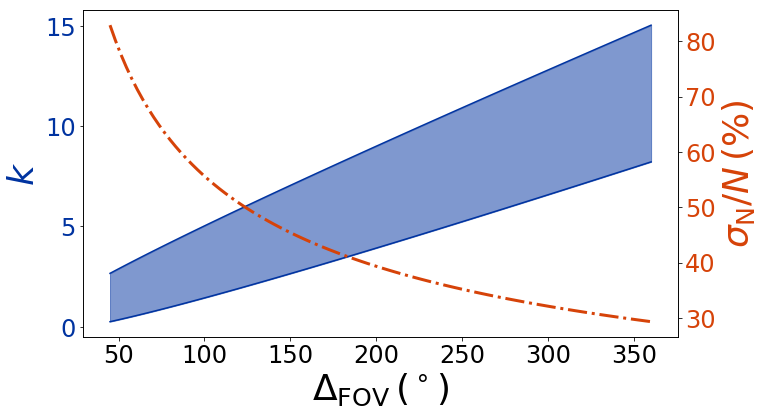

In [21]:
# 2020 May 18 - Calculating recovery rates
def recovery_rates(D, N, alpha, FOV):
    return N*D**2/2/alpha**2*FOV

fig = plt.figure(figsize=(6*aspect_ratio, 6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()

D = 0.01 # 10 m to km
N = 0.03 # DD/km^2 (Figure 11 from Greeley et al. 2006)
alpha = 0.3e-3*3 # radians per pixel (but I need three pixels to resolve the dust devil)

FOVs = np.linspace(45., 360., 100)

num_devils = recovery_rates(D, N, alpha, FOVs*np.pi/180.)

# ax1.plot(FOVs, num_devils, color=BoiseState_blue, lw=3)
ax1.plot(FOVs, num_devils + np.sqrt(num_devils), color=BoiseState_blue)
ax1.plot(FOVs, num_devils - np.sqrt(num_devils), color=BoiseState_blue)
ax1.fill_between(FOVs, num_devils - np.sqrt(num_devils), num_devils + np.sqrt(num_devils), 
                 color=BoiseState_blue, alpha=0.5)
ax2.plot(FOVs, 1/np.sqrt(num_devils)*100, color=BoiseState_orange, lw=3, ls='-.')

# t = 1 week's worth of four hour days
ax1.set_xlabel("$\\Delta_{\\rm FOV}\,\\left({\\rm ^\\circ}\\right)$", fontsize=36)
ax1.set_ylabel("$k$", fontsize=36, color=BoiseState_blue)
ax2.set_ylabel("$\\sigma_{\\rm N}/N\,\\left( \% \\right)$", fontsize=36, color=BoiseState_orange)

ax1.tick_params(axis='both', labelsize=24)
ax1.tick_params(axis='y', labelcolor=BoiseState_blue)
ax2.tick_params(axis='both', labelsize=24)
ax2.tick_params(axis='y', labelcolor=BoiseState_orange)

# ax2.set_ylim([0, 0.5])

# fig.savefig("DDs_vs_Delta.jpg", dpi=500, bbox_inches="tight")

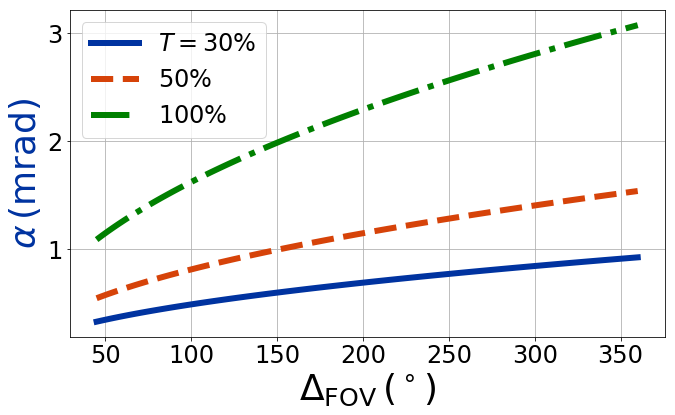

In [32]:
def alpha_vs_Delta(N, D, FOV, T):
    return np.sqrt(N)*D*np.sqrt(FOV)*T/np.sqrt(2)

fig = plt.figure(figsize=(6*aspect_ratio, 6))
ax1 = fig.add_subplot(111)

D = 0.01 # 10 m to km
N = 0.03 # DD/km^2 (Figure 11 from Greeley et al. 2006)
FOVs = np.linspace(45., 360., 100)

T = 0.3
alphas = alpha_vs_Delta(N, D, FOVs*np.pi/180., T)*1e3 # mrad
ax1.plot(FOVs, alphas, color=BoiseState_blue, lw=6, label="$T = 30\%$")

T = 0.5
alphas = alpha_vs_Delta(N, D, FOVs*np.pi/180., T)*1e3 # mrad
ax1.plot(FOVs, alphas, color=BoiseState_orange, lw=6, ls='--', label="$50\%$")

T = 1.
alphas = alpha_vs_Delta(N, D, FOVs*np.pi/180., T)*1e3 # mrad
ax1.plot(FOVs, alphas, color='green', lw=6, ls='-.', label="$100\%$")

ax1.set_xlabel("$\\Delta_{\\rm FOV}\,\\left({\\rm ^\\circ}\\right)$", fontsize=36)
ax1.set_ylabel("$\\alpha\,\\left({\\rm mrad}\\right)$", fontsize=36, color=BoiseState_blue)

ax1.tick_params(axis='both', labelsize=24)
ax1.grid(True)
ax1.legend(loc='best', fontsize=24)

fig.savefig("alpha_vs_Delta.jpg", dpi=500, bbox_inches="tight")

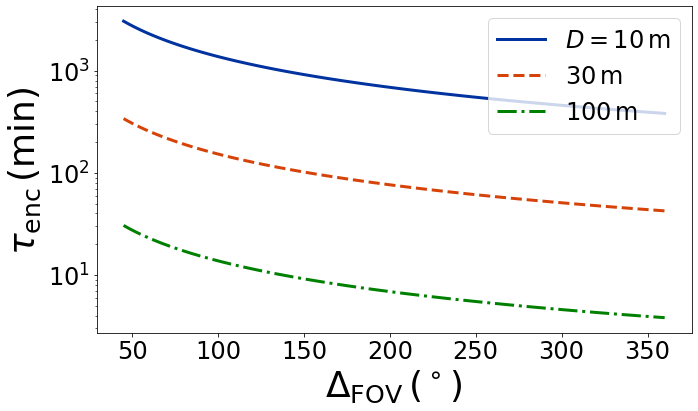

In [93]:
def encounter_times(n, FOV, D, pmin, alpha):
    return 1./(n*FOV/2.*(D/pmin/alpha)**2)

fig = plt.figure(figsize=(6*aspect_ratio, 6))

n = 0.05/60.
pmin = 10.
alpha = 1e-3
FOVs = np.linspace(45., 360., 100)

D = 0.01 # m to km
ax1 = fig.add_subplot(111)
ax1.semilogy(FOVs, encounter_times(n, FOVs*np.pi/180., D, pmin, alpha), lw=3, color=BoiseState_blue,
         label="$D = 10\,{\\rm m}$")
D = 0.03 # m to km
ax1.semilogy(FOVs, encounter_times(n, FOVs*np.pi/180., D, pmin, alpha), lw=3, color=BoiseState_orange, ls="--",
         label="$30\,{\\rm m}$")
D = 0.1 # m to km
ax1.semilogy(FOVs, encounter_times(n, FOVs*np.pi/180., D, pmin, alpha), lw=3, color='green', ls="-.",
         label="$100\,{\\rm m}$")

ax1.legend(loc="best", fontsize=24)
ax1.tick_params(which="both", labelsize=24)
ax1.set_xlabel("$\\Delta_{\\rm FOV}\, \\left(^\\circ\\right)$", fontsize=36)
ax1.set_ylabel("$\\tau_{\\rm enc}\,\\left({\\rm min}\\right)$", fontsize=36)

fig.savefig("encounter_time.jpg", dpi=500, bbox_inches="tight")

/Users/brian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


(-3, 5)

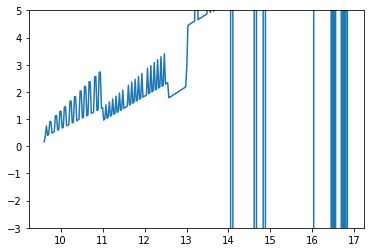

In [42]:
# From Wu et al. (2019) - https://meetingorganizer.copernicus.org/EPSC-DPS2019/EPSC-DPS2019-378-1.pdf
filename = "Wu2019_Fig1.txt"

data = np.genfromtxt(filename, delimiter=", ", names=["time", "depth"])

_, unq = np.unique(data['time'], return_index=True)
time = data["time"][unq]
depth = data["depth"][unq]

ddepth_dtime = np.gradient(depth, time)
plt.plot(time, depth/ddepth_dtime)
plt.ylim([-3, 5])

# Timescale is maybe 2-3 hours